# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement, 
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease

Kaggle version available: https://www.kaggle.com/c/heart-disease-uci/data

## 3. Evaluation

> If accuracy of 95% heart disease prediction is reached, project is viable.

## 4. Features

Features of the data are presented below:

**Create data dictionary**

1. age. The age of the patient.
2. sex. The gender of the patient. (1 = male, 0 = female).
3. cp. Type of chest pain. 
    * 1 = typical angina
    * 2 = atypical angina
    * 3 = non — anginal pain
    * 4 = asymptotic
4. trestbps. Resting blood pressure in mmHg.
5. chol. Serum Cholestero in mg/dl.
6. fbs. Fasting Blood Sugar. 
    * 1 = fasting blood sugar is more than 120mg/dl
    * 0 = otherwise
7. restecg. Resting ElectroCardioGraphic results
    * 0 = normal, 1 = ST-T wave abnormality
    * 2 = left ventricular hyperthrophy
8. thalach. Max heart rate achieved.
9. exang. Exercise induced angina (
    * 1 = yes 
    * 0 = no
10. oldpeak. ST depression induced by exercise relative to rest.
11. slope. Peak exercise ST segment (
    * 1 = upsloping 
    * 2 = flat
    * 3 = downsloping
12. ca. Number of major vessels (0–3) colored by flourosopy.
13. thal. Thalassemia (
    * 3 = normal, 
    * 6 = fixed defect
    * 7 = reversible defect
14. num. Diagnosis of heart disease 
    * 0 = absence, 
    * 1, 2, 3, 4 = present

## Preparing the tools

Used libraries: Pandas, Matplotlb, NumPy, Seaborn

In [3]:
# Import exploratory data analysis libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To make plots visible in notebooks
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [5]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

##  Data Exploration (exploratory data analysis or EDA)

1. What question(s) is to solve?
2. What kind of data is collected and how to treat different types?
3. What is missing from the data and how to treat this issue?
4. Where are outliers and why should we be concerned with them?
5. How can you add, change or remove features to get more out of data?

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# How many of each class are there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

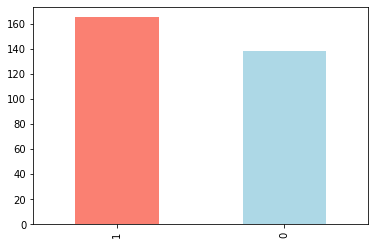

In [11]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease Frequency according to Sex

In [17]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [18]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


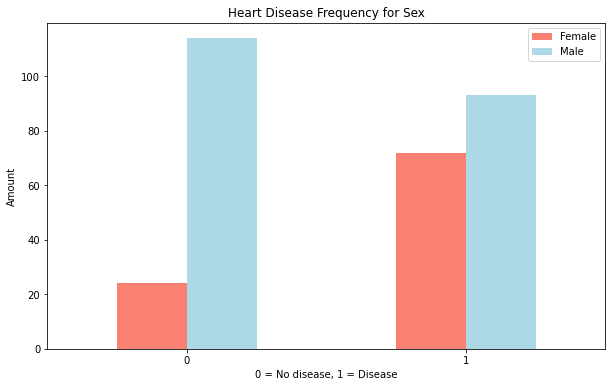

In [22]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"]);

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

In [23]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs. Max Heart Rate for Heart Disease

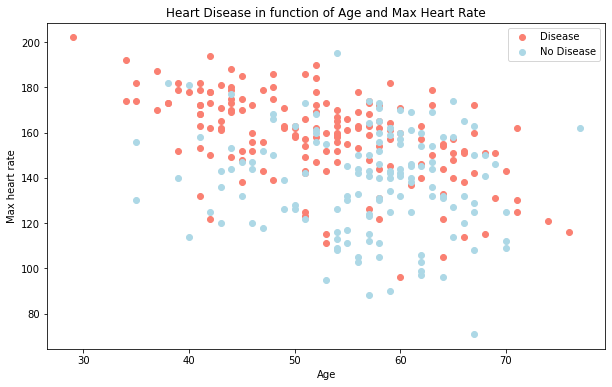

In [30]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive examples
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon");

# Scatter with negative examples
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max heart rate")
plt.legend(["Disease", "No Disease"]);

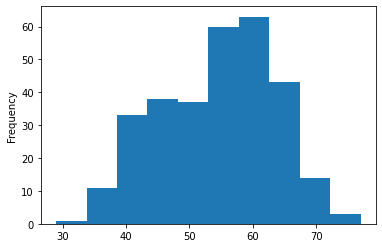

In [32]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

### Heart Disease Frequency per Chest Pain Type

cp. Type of chest pain.
* 1 = typical angina
* 2 = atypical angina
* 3 = non — anginal pain
* 4 = asymptotic

In [33]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [34]:
# Interesting pattern emerges - anginal pain is worse indicator than non-anginal pain

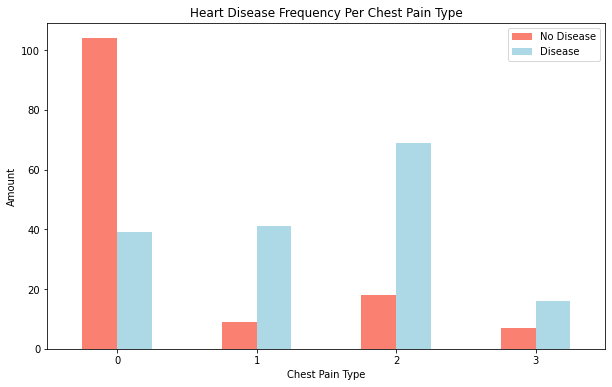

In [43]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [44]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


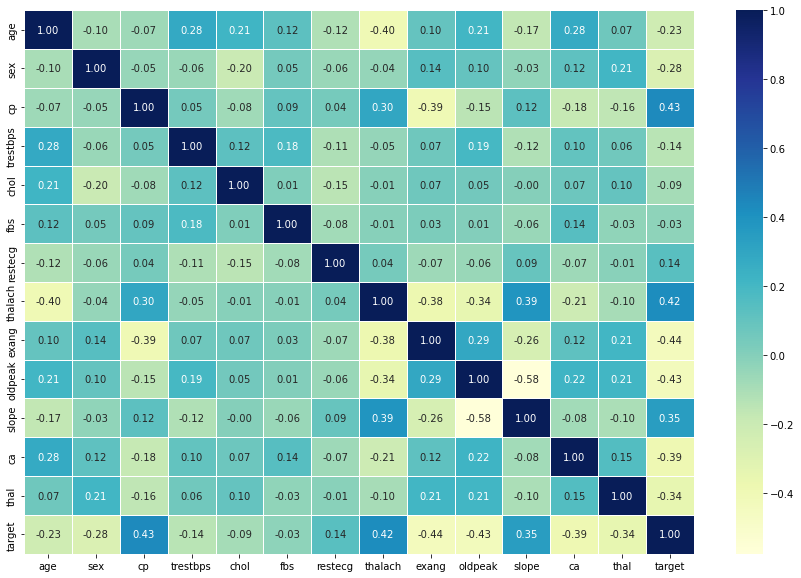

In [45]:
# Let's make our correlation matrix more visual
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

## 5. Modelling

In [46]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [55]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Data is split into training and test sets. We can build machine learning model

It will be trained on the training set and tested on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [60]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different sklearn models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training data
    y_test : testing data
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop though models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to mode_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [61]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

E:\Supervised-Learning-Classification\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model Comparison

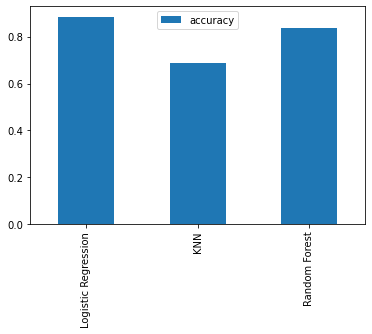

In [63]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Improving and evaluating models:

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [64]:
# KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop though different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorythm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


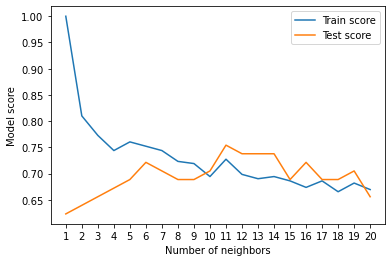

In [68]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

Models to tune:

* LogisticRegression()
* RandomForestClassifier()

Method: RandomizedSearchCV

In [80]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [81]:
# RandomizedSearchCV

# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [82]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [83]:
# Evaluate
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [84]:
# RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [85]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [87]:
# Evaluate (before ~68%)
rs_rf.score(X_test, y_test)

0.8688524590163934

Let's check previous scores

In [88]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameters tuning for LogisticRegression with GridSearchCV

Since LogisticRegression model provides the best scores so far we will try and improve them again using GridSearchCV

In [90]:
# Different hyperparameters for LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [91]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [92]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating tuned machine learning classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
* Cross-validation

To make comparisons and evaluate a trained model, first we need to make predictions.

In [94]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [95]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC curve

E:\Supervised-Learning-Classification\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


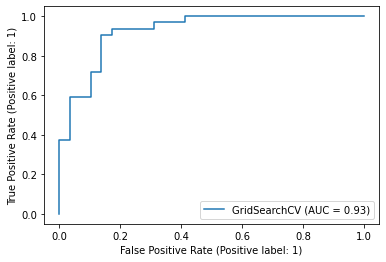

In [96]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test);

### Confusion matrix

In [97]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


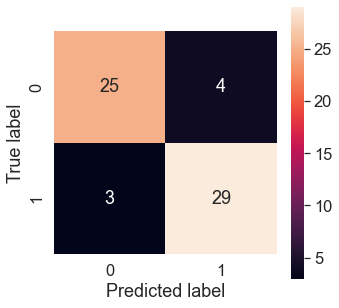

In [105]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=True,
                     square=True)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_preds)

### Classification report

In [106]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

Accuracy, Precison, Recall and F1-score using `cross_val_score()`

In [107]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [108]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [114]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

In [115]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [116]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [117]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [118]:
# Cross-validated F1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

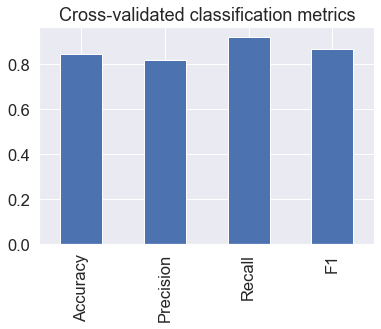

In [121]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

### Feature importance

Which features contributed most to the outcome of the model?

How did they contribute?

Finding feature importance is different for each machine learning model.

### LogisticRegression feature importance

In [127]:
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [131]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [129]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

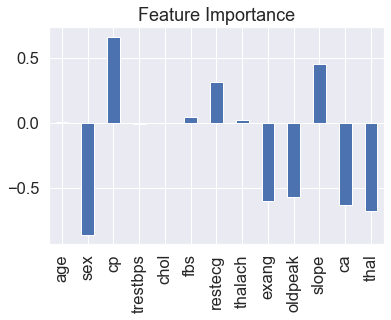

In [133]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

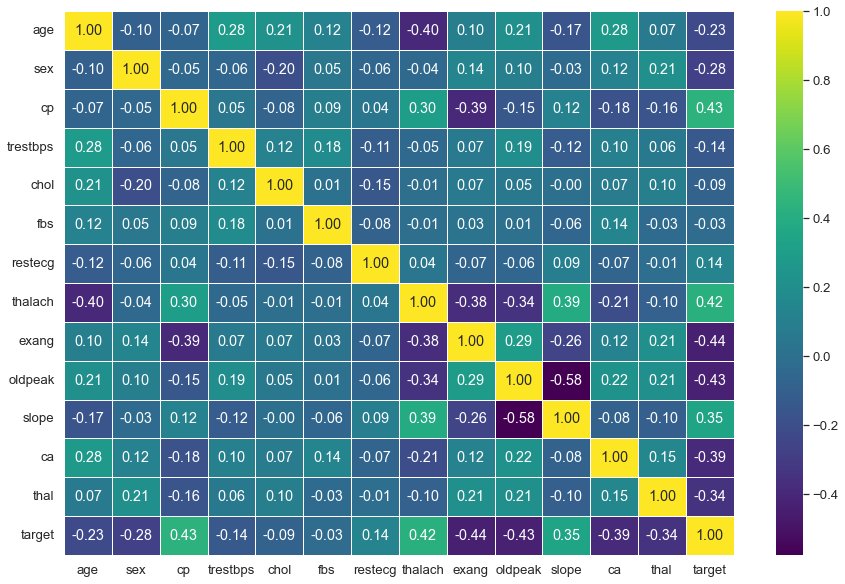

In [157]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.set(font_scale=1.2)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="viridis");

## 6. Experimentation

Looking for further improvement:

* Collecting more data
* Reviewing other models
* Trying more extensive `GridSearchCV()` hyperparameter search

### Sharing a model

In [159]:
from joblib import dump, load
dump(clf, "Logistic_regression_model_v1.joblib")

['Logistic_regression_model_v1.joblib']

In [160]:
clf_imported = load("Logistic_regression_model_v1.joblib")
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)